In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clinic=pd.read_csv('data/clinicaltrial_data.csv')
mouse=pd.read_csv('data/mouse_drug_data.csv')

In [4]:
df=pd.merge(clinic,mouse,on='Mouse ID')

In [5]:
group=df.copy()
del group['Metastatic Sites']
group=group.groupby(['Drug','Timepoint'])

In [6]:
mean_vol=group.mean()
mean_vol=mean_vol.reset_index()
mean_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
sem_vol=group['Tumor Volume (mm3)'].sem()
sem_vol=sem_vol.reset_index()
sem_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
reform_vol=mean_vol.pivot_table('Tumor Volume (mm3)','Timepoint','Drug')
reform_vol=reform_vol.reset_index()
reform_vol.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [10]:
reform_sem=sem_vol.pivot_table('Tumor Volume (mm3)','Timepoint','Drug')
reform_sem=reform_sem.reset_index()
reform_sem.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


<IPython.core.display.Javascript object>


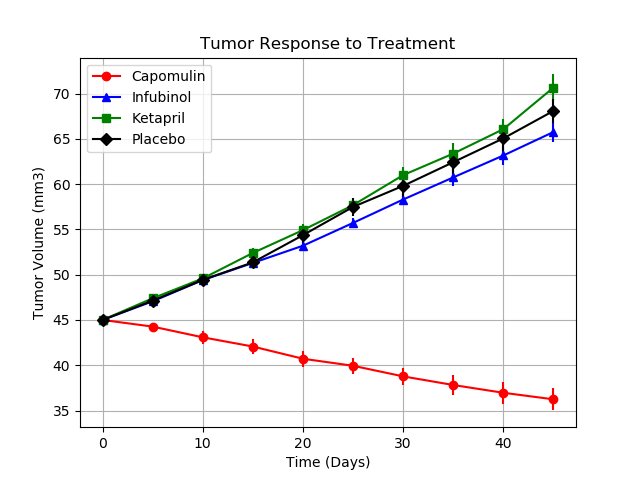

In [11]:
plt.plot(reform_vol['Timepoint'],reform_vol['Capomulin'], marker="o", color='red')
plt.errorbar(reform_vol['Timepoint'],reform_vol['Capomulin'],yerr=reform_sem['Capomulin'],linestyle="None",color='red',label='_nolegend_')
plt.plot(reform_vol['Timepoint'],reform_vol['Infubinol'],marker='^', color='blue')
plt.errorbar(reform_vol['Timepoint'],reform_vol['Infubinol'],yerr=reform_sem['Infubinol'],linestyle="None",color='blue',label='_nolegend_')
plt.plot(reform_vol['Timepoint'],reform_vol['Ketapril'],marker='s',color='green')
plt.errorbar(reform_vol['Timepoint'],reform_vol['Ketapril'],yerr=reform_sem['Ketapril'],linestyle="None",color='green',label='_nolegend_')
plt.plot(reform_vol['Timepoint'],reform_vol['Placebo'],marker='D', color='black')
plt.errorbar(reform_vol['Timepoint'],reform_vol['Placebo'],yerr=reform_sem['Placebo'],linestyle="None",color='black',label='_nolegend_')
plt.legend(loc="upper left")
plt.title('Tumor Response to Treatment')
plt.xlabel("Time (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

In [12]:
plt.savefig("tumor_volume.png")
plt.close()

In [17]:
metastatic=df.copy()
del metastatic['Tumor Volume (mm3)']
meta=metastatic.groupby(['Drug','Timepoint']).mean()
meta=meta.reset_index()
meta=meta.pivot_table('Metastatic Sites','Timepoint','Drug')
meta=meta.reset_index()
meta.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [18]:
meta_sem=metastatic.groupby(['Drug','Timepoint']).sem()
meta_sem=meta_sem.reset_index()
meta_sem=meta_sem.pivot_table('Metastatic Sites','Timepoint','Drug')
meta_sem=meta_sem.reset_index()
meta_sem.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


<IPython.core.display.Javascript object>


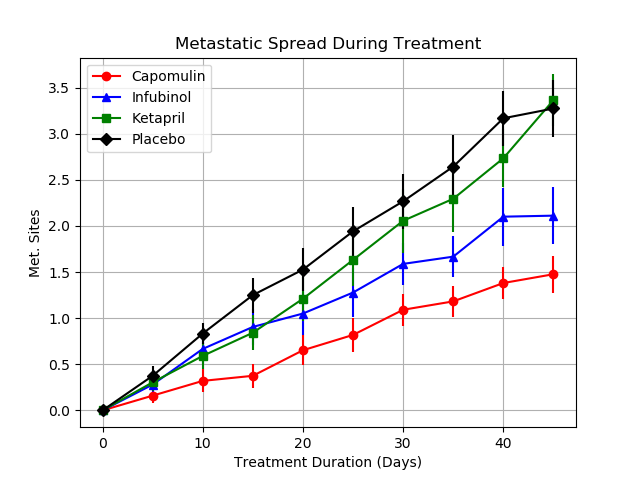

In [19]:
plt.plot(meta['Timepoint'],meta['Capomulin'], marker="o", color='red')
plt.errorbar(meta['Timepoint'],meta['Capomulin'],yerr=meta_sem['Capomulin'],linestyle="None",color='red',label='_nolegend_')
plt.plot(meta['Timepoint'],meta['Infubinol'],marker='^', color='blue')
plt.errorbar(meta['Timepoint'],meta['Infubinol'],yerr=meta_sem['Infubinol'],linestyle="None",color='blue',label='_nolegend_')
plt.plot(meta['Timepoint'],meta['Ketapril'],marker='s',color='green')
plt.errorbar(meta['Timepoint'],meta['Ketapril'],yerr=meta_sem['Ketapril'],linestyle="None",color='green',label='_nolegend_')
plt.plot(meta['Timepoint'],meta['Placebo'],marker='D', color='black')
plt.errorbar(meta['Timepoint'],meta['Placebo'],yerr=meta_sem['Placebo'],linestyle="None",color='black',label='_nolegend_')
plt.legend(loc="upper left")
plt.title('Metastatic Spread During Treatment')
plt.xlabel("Treatment Duration (Days)")
plt.ylabel('Met. Sites')
plt.grid()
plt.show()

In [20]:
plt.savefig("metastasis.png")
plt.close()

In [21]:
mice=df.copy()
del mice['Metastatic Sites']
del mice['Tumor Volume (mm3)']
mice=mice.groupby(['Drug','Timepoint']).count()
mice=mice.reset_index()
mice=mice.pivot_table('Mouse ID','Timepoint','Drug')
mice=mice.reset_index()
mice.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [28]:
mice_percent=mice.copy()
initial_mice=next(mice_percent.iterrows())[1]
for i in range(1,len(initial_mice)):
    mice_percent.iloc[:,i]=mice_percent.iloc[:,i]/(initial_mice[i])
    mice_percent.iloc[:,i]=mice_percent.iloc[:,i] * 100
mice_percent.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


<IPython.core.display.Javascript object>


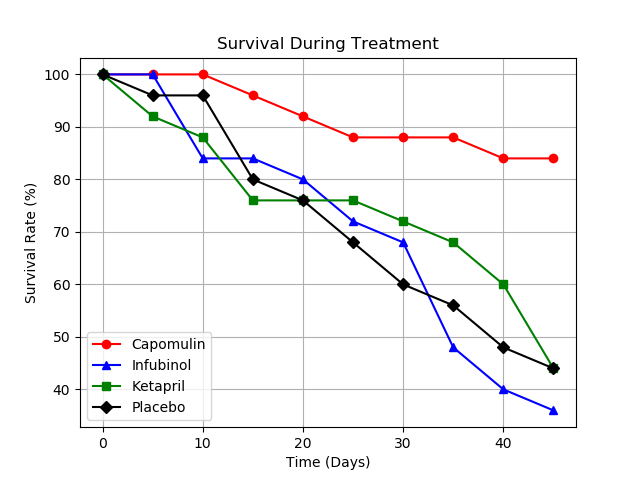

In [29]:
plt.plot(mice_percent['Timepoint'],mice_percent['Capomulin'], marker="o", color='red')
plt.plot(mice_percent['Timepoint'],mice_percent['Infubinol'],marker='^', color='blue')
plt.plot(mice_percent['Timepoint'],mice_percent['Ketapril'],marker='s',color='green')
plt.plot(mice_percent['Timepoint'],mice_percent['Placebo'],marker='D', color='black')
plt.legend(loc="lower left")
plt.title('Survival During Treatment')
plt.xlabel("Time (Days)")
plt.ylabel('Survival Rate (%)')
plt.grid()
plt.show()

In [30]:
plt.savefig("survival.png")
plt.close()

In [31]:
last=len(reform_vol['Timepoint'])-1
columns=list(reform_vol.columns)
columns.remove('Timepoint')
change=[(((reform_vol.iloc[last,x] - reform_vol.iloc[0,x]) /reform_vol.iloc[0,x]) * 100) for x in range(1,len(columns)+1)]
bars=dict(zip(columns,change))
bars

{'Capomulin': -19.475302667894155,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.12347172785184,
 'Ketapril': 57.02879468660604,
 'Naftisol': 53.923347134769195,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.32090046276666,
 'Stelasyn': 52.085134287898995,
 'Zoniferol': 46.57975086509522}

In [32]:
colors={}
for key in bars:
    if bars[key]>0:
        colors[key]='red'
    else:
        colors[key]='green'
graph=['Capomulin','Infubinol','Ketapril','Placebo']
x_axis=np.arange(len(graph))

<IPython.core.display.Javascript object>


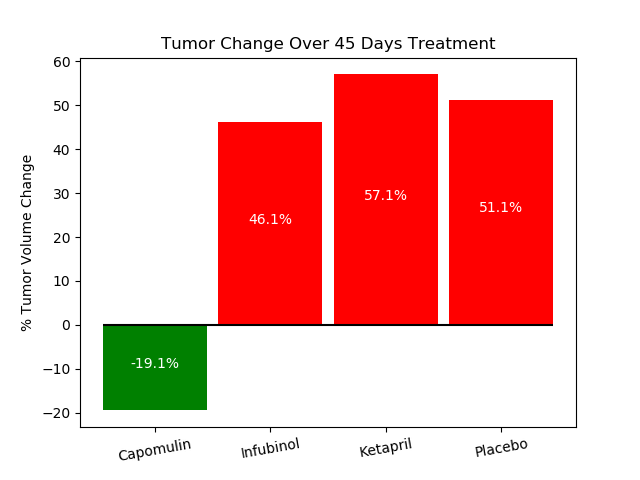

In [34]:
plt.bar(x_axis,[bars[x] for x in graph],color=[colors[x] for x in graph],align='center',width=0.9)
plt.xticks(x_axis,graph,rotation=10)
for x in x_axis:
    plt.text(x_axis[x],bars[graph[x]]/2,('%d.1%%' % bars[graph[x]]),color='white',ha='center')
plt.hlines(0,x_axis.min()-0.45,x_axis.max()+0.45)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Days Treatment')
plt.show()

In [35]:
plt.savefig("percent_change.png")
plt.close()